### Principal Componet Analysis


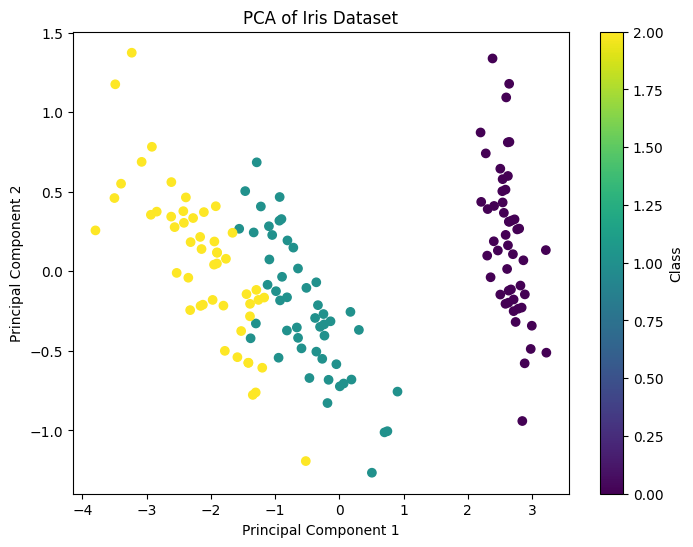

In [1]:
import numpy as np

class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.mean = None
        self.components = None
        self.explained_variance = None

    def fit(self, X):
        # Standardize the data
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean

        # Compute the covariance matrix
        cov_matrix = np.cov(X_centered, rowvar=False)

        # Compute eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

        # Sort eigenvalues and eigenvectors
        sorted_indices = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[sorted_indices]
        eigenvectors = eigenvectors[:, sorted_indices]

        # Select the top n_components eigenvectors
        self.components = eigenvectors[:, :self.n_components]
        self.explained_variance = eigenvalues[:self.n_components]

    def transform(self, X):
        X_centered = X - self.mean
        return np.dot(X_centered, self.components)

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

# Example Usage
if __name__ == "__main__":
    from sklearn.datasets import load_iris
    import matplotlib.pyplot as plt

    # Load dataset
    iris = load_iris()
    X = iris.data
    y = iris.target

    # Perform PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    # Plotting  the results
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
    plt.colorbar(scatter, label='Class')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA of Iris Dataset')
    plt.show()
